<img src="istockphoto.jpg" style="width:100%;height:400px"/>

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with
the knowledge of the ones that turned out to be fraud. This model is then used to identify
whether a new transaction is fraudulent or not. 

My aim here is to detect 100% of the fraudulent
transactions while minimizing the incorrect fraud classifications. 

The dataset that is used for credit card fraud detection is derived from the Kaggle
https://www.kaggle.com/mlg-ulb/creditcardfraud
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.


In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import  Data  and loading our dataset
cards = '/Users/egoretc/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Data Wrangling

First, I need to get to know my dataset.

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,  the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [26]:
#Explore the data
cardsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [27]:
#selecting column names
print(cardsdf.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [28]:
#Checking for null values
display(cardsdf.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset contains no missing values.

In [7]:
# rows and columns
print(cardsdf.shape)

(284807, 31)


In [8]:
#Checking for duplicate values
cardsdf.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

So I am done with Data Wrangling. I do not have missing values  and duplicates, and any dummy columns. 

I do not have to manipulate data to make it  suitabale for analysis. I am ready to do Exploratory Data Analysis next. 

# Exploratory Data Analysis

<img src="panalys.jpg" style="width:100%;height:450px"/>

To be able to analyze data, I created labels for Class. Class is the target feature that is the final investigation prediction. 

If Class is 1 , this is going to be a Fraud transaction. 

If Class is 0, this is going to be a Normal transaction. This is even good already for a supervised learning algorithm to do. 
 

In [29]:
#Assigning Class  and outlier fraction 
Fraud = cardsdf[cardsdf['Class']==1]
Normal = cardsdf[cardsdf['Class']==0]
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction

0.0017304750013189597

Next, I will compute and visualize quantity of Normal vs Fraud transactions.

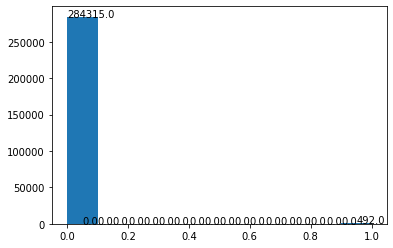

In [5]:
#Counting Fraud and Normal transactions
bins=20
arr=plt.hist(cardsdf.Class, bins=bins)
for i in range(bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
    plt.hist(cardsdf.Class, bins=10)

As was reported, in this dataset I have 284315.0 of Normal transactions and 492 of Fraud transactions. This is very imbalanced. I am going to have a hard time to train a good model just having this little information about Fraud.  

Now I know Class labels so I can figure out the mean of each V by Class

In [30]:
#taking mean of each variable by Class
print(cardsdf.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

So, taking a look at the mean at the mean I can tell that Fraud vs Normal transactions are covariate. This is meaningful information. I can tell a pattern and what is different between them. Also, interestingly, Amount of Fraud means is greater than Amount of Normal means.


Now I just visualize Time distribution of fraudulent transactions vs Normal.

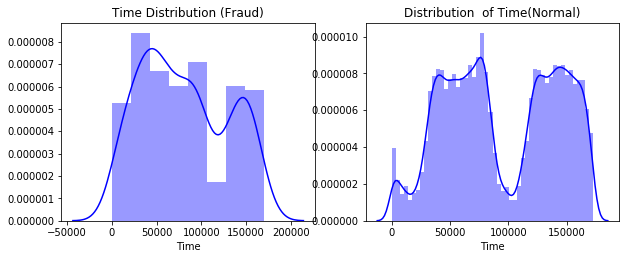

In [16]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Fraud)')

sns.distplot(Fraud.Time, color='blue');

#plot the  time feature
plt.subplot(2, 2, 2)
plt.title('Distribution  of Time(Normal)')
sns.distplot(Normal.Time,color='blue');

These two distributions do not look different a lot but plots tell about how different distributions over the time only. So I do not have meaningful information here. By looking at the distributions we can have an idea how skewed are these features. Normal Distribution does not look normal. Distribution rises and declines, up and down. Fraud distribution has less turbulence as it is frequency is much less.


But at what time did the fraud transaction happen?

In [12]:
Fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

So according to this description, Fraud transactions happened between 406sec and 170348sec. I applied a filter to display data only for this timestamp and looked if I can find any trends.

In [73]:
#apply filter on Time feature
timestamp = cardsdf[(cardsdf['Time']>406) & (cardsdf['Time']< 170348)]
filteredata = timestamp.groupby(['Class']).mean()
print(filteredata)

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94165.141662  0.008421 -0.011070  0.019426 -0.007283  0.002444   
1      80727.908163 -4.790772  3.634262 -7.053431  4.551575 -3.165371   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.003589  0.008373 -0.001401  0.004423  ... -0.000544 -0.001307   
1     -1.400333 -5.586737  0.570264 -2.587184  ...  0.373616  0.715781   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000773 -0.000427 -0.000107  0.001201 -0.000093 -0.000371 -0.000092   
1      0.014780 -0.039376 -0.105294  0.040888  0.052087  0.170732  0.076300   

           Amount  
Class              
0       88.590972  
1      122.623347  

[2 rows x 30

Trends are different now. I was wrong about Class covariance. V24 now is a negative number for both Fraud and Normal. So this pattern that I assumed was not true. To find correlation and trends I made a plot of a random feature and class to look into if there is a relation between them. If V23 has both negative numbers for Fraud and Normal, is this a negative or positive correlation or no correlation at all.


Text(0.5, 0, 'Class')

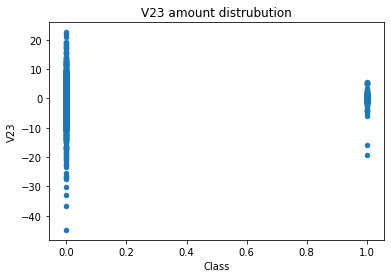

In [76]:
#plot a scatterplot
_= cardsdf.plot.scatter(x='Class',

                     y='V23'

                    ) ;plt.title('V23 amount distrubution');plt.xlabel('Class')

So, according to the plot there is no correlation at all. So my assumptions are wrong. There is no positive or negative trend. And the same idea will apply for all V's.


It is time to look at what plot will tell about transactions amount of Fraud vs Normal.

C:\Users\egoretc\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


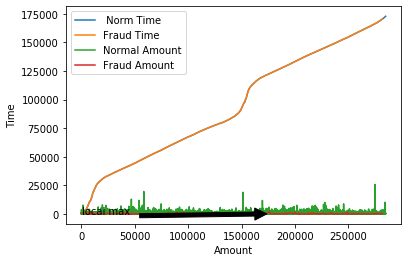

In [69]:
#multiple plots
fig, ax = plt.subplots()
ax.plot(Normal.Time,  label=" Norm Time")
ax.plot(Fraud.Time,  label="Fraud Time")
ax.plot(Normal.Amount,  label="Normal Amount")
ax.plot(Fraud.Amount, label="Fraud Amount")

plt.annotate('local max', xy=(180300, 100), xytext=(1000, 30),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.legend()
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

Perfect. Time of Normal and Fraud distributed equally just Normal Time tail is longer. Annotation will show the local max of a distribution where there was a spike. In this case, I show a local max of the fraud transaction amount. This plot is very meaningful. It tells at what time transactions happened by grouping it as Amount. Fraud local max, for example, happened at about 125000sec. And in the same manner it tells about any transactions. 
Next what I did is finding out Amount of Fraudulent transactions vs Normal for an individual V.



It is time to find out Amount of Fraudalant transactions  vs Normal  for an individual V.

Text(0.5, 0, 'Class')

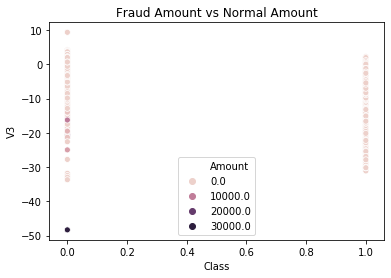

In [16]:
#plot a sns scatterplot
sns.scatterplot(x='Class',

                     y='V3',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

Text(0.5, 0, '')

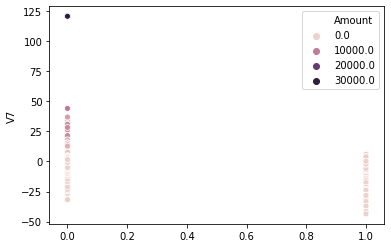

In [82]:
plot a sns scatterplot
sns.scatterplot(x='Class',

                     y='V7',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

Text(0.5, 0, '')

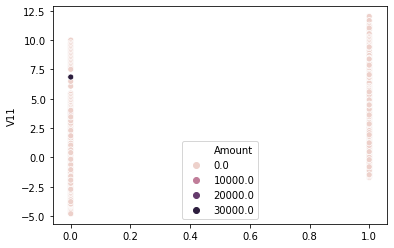

In [83]:
#plot a sns scatterplot
sns.scatterplot(x='Class',

                     y='V11',
                     
                     hue = 'Amount',
                 
                     data=cardsdf

                    ) ;plt.title('Fraud Amount vs Normal Amount');plt.xlabel('Class')

Unfortunately, these detailed plots did not detect any amount of fraudulent transactions for these individual V's. But we can go further and check them all. Doing it will take a lot of time that's why for this case I just took random V's and did not detect it according to visualizations.

But what catched my attention is V7 Normal distribution. In V7 plot distribution of Normal transactions has a suspicious number that is far away from all numbers. This outlier is highly likely to be fraud.



Text(25000, 125, 'outlier')

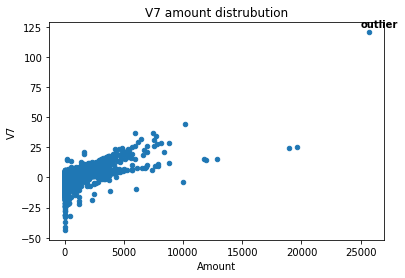

In [64]:
plot a scatterplot
_= cardsdf.plot.scatter(x='Amount',

                     y='V7'

                    ) ;plt.title('V7 amount distrubution');plt.xlabel('Amount')
_.text(25000, 125, "outlier", horizontalalignment='left', size='medium', color='black', weight='semibold')

This plot proves the correlation matrix. The correlation is positive as the correlation matrix identified. It also shows a point which is far from norm and I annotated this point as outlier but this is possibly a fraud here because this point is very different from all the normal points. This is called "Anomaly Detection".



Anomaly detection is the process of identifying unexpected items or events in data sets, which differ from the norm. And anomaly detection is often applied on unlabeled data which is known as unsupervised anomaly detection. Anomaly detection has two basic assumptions:

    Anomalies only occur very rarely in the data.
    Their features differ from the normal instances significantly.
    
I annotated a  point of interest  to pay attention for further analysis.

# Statistical Analysis

There are two types if statistical analysis: Descriptive and Inferential. Descriptive statistics are used to describe a situation.	Inferential statistics ar used to explain the chances of occurrence of an event.

#### Part1: Descriptive statistics

In [13]:
#describe a dataset
cardsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


This is a summary of a statistical description for each feature in the dataset: their mean, their standart deviation and quartiles. I can even find median and mode of any feature  for this type of analysis.

Next, it is good to make a Correlation Matrix. Correlation Matrix will tell if any relation between features are present. 

The correlation coefficient (also known as the Pearson correlation coefficient) measures how well two variables are related in a linear (straight line) fashion, and is always called r. r lies between -1 and +1. A value of r = -1 means that the two variables are exactly negatively correlates, i.e., as one variable goes up, the other goes down. A value of r = +1 means that the two variables are exactly positively correlates, i.e., as one variable goes up, the other goes up. A value of r = 0, means that the two variables are not linearly related.

This is going to be a meaningful information. But I will not detect a proper correlation because I have very imbalanced data.

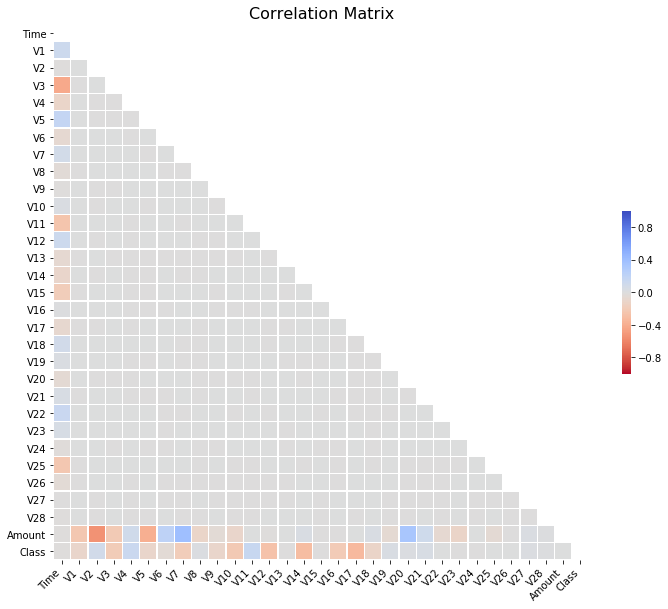

In [15]:
#plot a correlation matrix
plt.figure(figsize=(12,10))
corr = cardsdf.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
cmap='coolwarm_r',    
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3},   
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);


Negative Correlations: V2, Amount,  and V5, Amount are negatively correlated. 

Positive Correlations: V7, Amount, and V20, Amount are positively correlated.

I have some more correlations found but not so strong.

And again, data is so imbalanced that can produce wrong correlations.

Text(25000, -30, 'outlier')

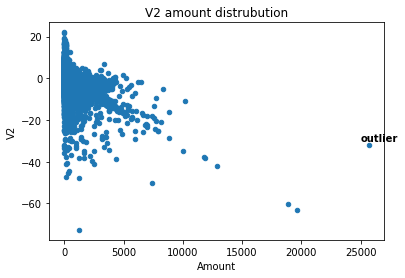

In [66]:
#plot a scatterplot
_= cardsdf.plot.scatter(x='Amount',

                     y='V2'

                    ) ;plt.title('V2 amount distrubution');plt.xlabel('Amount')
_.text(25000, -30, "outlier", horizontalalignment='left', size='medium', color='black', weight='semibold')

As you can see, this plot proves the correlation matrix is correct on this relation. There is a negative correlation between these two variables. Outlier point is possibly fraud activity that will be classified as ANOMALY

#### Part2 Inferential Statistics

# Hypothesis

I have a hypothesis about V2 Fraud and V2 Normal  means are not statistically significantly different.  I am testing two groups populations. In this case, I will perform so-called Ttest. So I need to prepare data for  a Null hypothesis  test.

In [40]:
#feature engineering for Ttest
V3groupF = Fraud.V2
n1 = len(V3groupF)
s1 = V3groupF.std()
x1 = V3groupF.mean()
print(n1,s1,x1)

492 4.291215626137477 3.6237781019822792


In [41]:
#feature engineering for Ttest
V3groupN = Normal.V2
n0 = len(V3groupN)
s0 = V3groupN.std()
x0 = V3groupN.mean()
print(n0,s0,x0)

284315 1.6361460525689644 -0.006270857415806876


Ttest

In [42]:
#perform a Ttest
from scipy.stats import ttest_ind
ttest = ttest_ind(V3groupF, V3groupN, equal_var = False)
ttest

Ttest_indResult(statistic=18.761176823315797, pvalue=1.2885797612095705e-59)

A standard alpha level is .05, and  pvalue= 1.2885797612095705e-59 is smaller than .05, so I am going to reject the null hypothesis which asserts there is no difference between our sample mean and the population mean. For this two-tail test, we reject the Null and we conclude that there is statistically significant difference .

Yes , I have a % confidence that my Null hypothesis is wrong. But what error size? I can find it by finding Cohen's d. Cohen's d is the difference measure between two groups. This is called effect size. I computed the effect size of how my two groups differed.


Cohen's d

In [44]:
import math as ma

# Calculate difference between means and pooled standard deviation
diff = V3groupF.mean() - V3groupN.mean() 
pooledstdev = ma.sqrt((V3groupF.std()**2 + V3groupN.std()**2)/2 )

# Calculate Cohen's d
cohend = diff / pooledstdev
print(cohend)

1.1178246710860031


Small effect = 0.2

Medium Effect = 0.5

Large Effect = 0.8

So according to this scale, my effect size is even larger than 1. This tells me that diffenece between my two tested groups is really big


# Conclusion

I explored data and found trends, negative and positive correlation, outliers. Of course, I can find more and discover more trends and correlations, and outliers if I take a closer look and take more time but at this point is good for now. I compared two groups in my Null Hypothesis and have a probability value in favor of Alternative Hypothesis. I found how big the difference is between the two groups and it is big. I compared two groups but if I have more than two groups(Fraud and Normal) to compare I can use ANOVA.


